In [1]:
%load_ext autoreload

In [2]:
%autoreload 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.gridspec import GridSpec
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error

def get_grouped(df):
    
    df = df.copy()[["y_hat", "y"]]
    df["error"] = df["y_hat"] - df["y"]
    df["pe"] = 100 * df["error"] / df["y"]
    df["ape"]= 100 * np.abs(df["error"]) / df["y"]
    
    df["bin"] = np.floor(df["y"] ).astype(int)

    grouped = df.groupby("bin").mean()
    return grouped


/home/vmeijer/.conda/envs/gspy/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [3]:
cirrus_mlp = pd.read_pickle("contrail_res_mlp_by_cirrus_model.pkl")
cirrus_conv = pd.read_pickle("contrail_res_conv_by_cirrus_model.pkl")
contrail_conv = pd.read_pickle("test_set_glad-resonance.pkl")
contrail_mlp = pd.read_pickle("contrail_mlp_res.pkl")

In [4]:
plt.rc("font", family='serif')

<ipython-input-5-1263d128ee1d>:44: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(y, y_hat, c=color, s=SIZE, alpha=ALPHA)
<ipython-input-5-1263d128ee1d>:44: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(y, y_hat, c=color, s=SIZE, alpha=ALPHA)
<ipython-input-5-1263d128ee1d>:44: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have pr

[Text(0.5, 0, 'Retrieval error, %')]

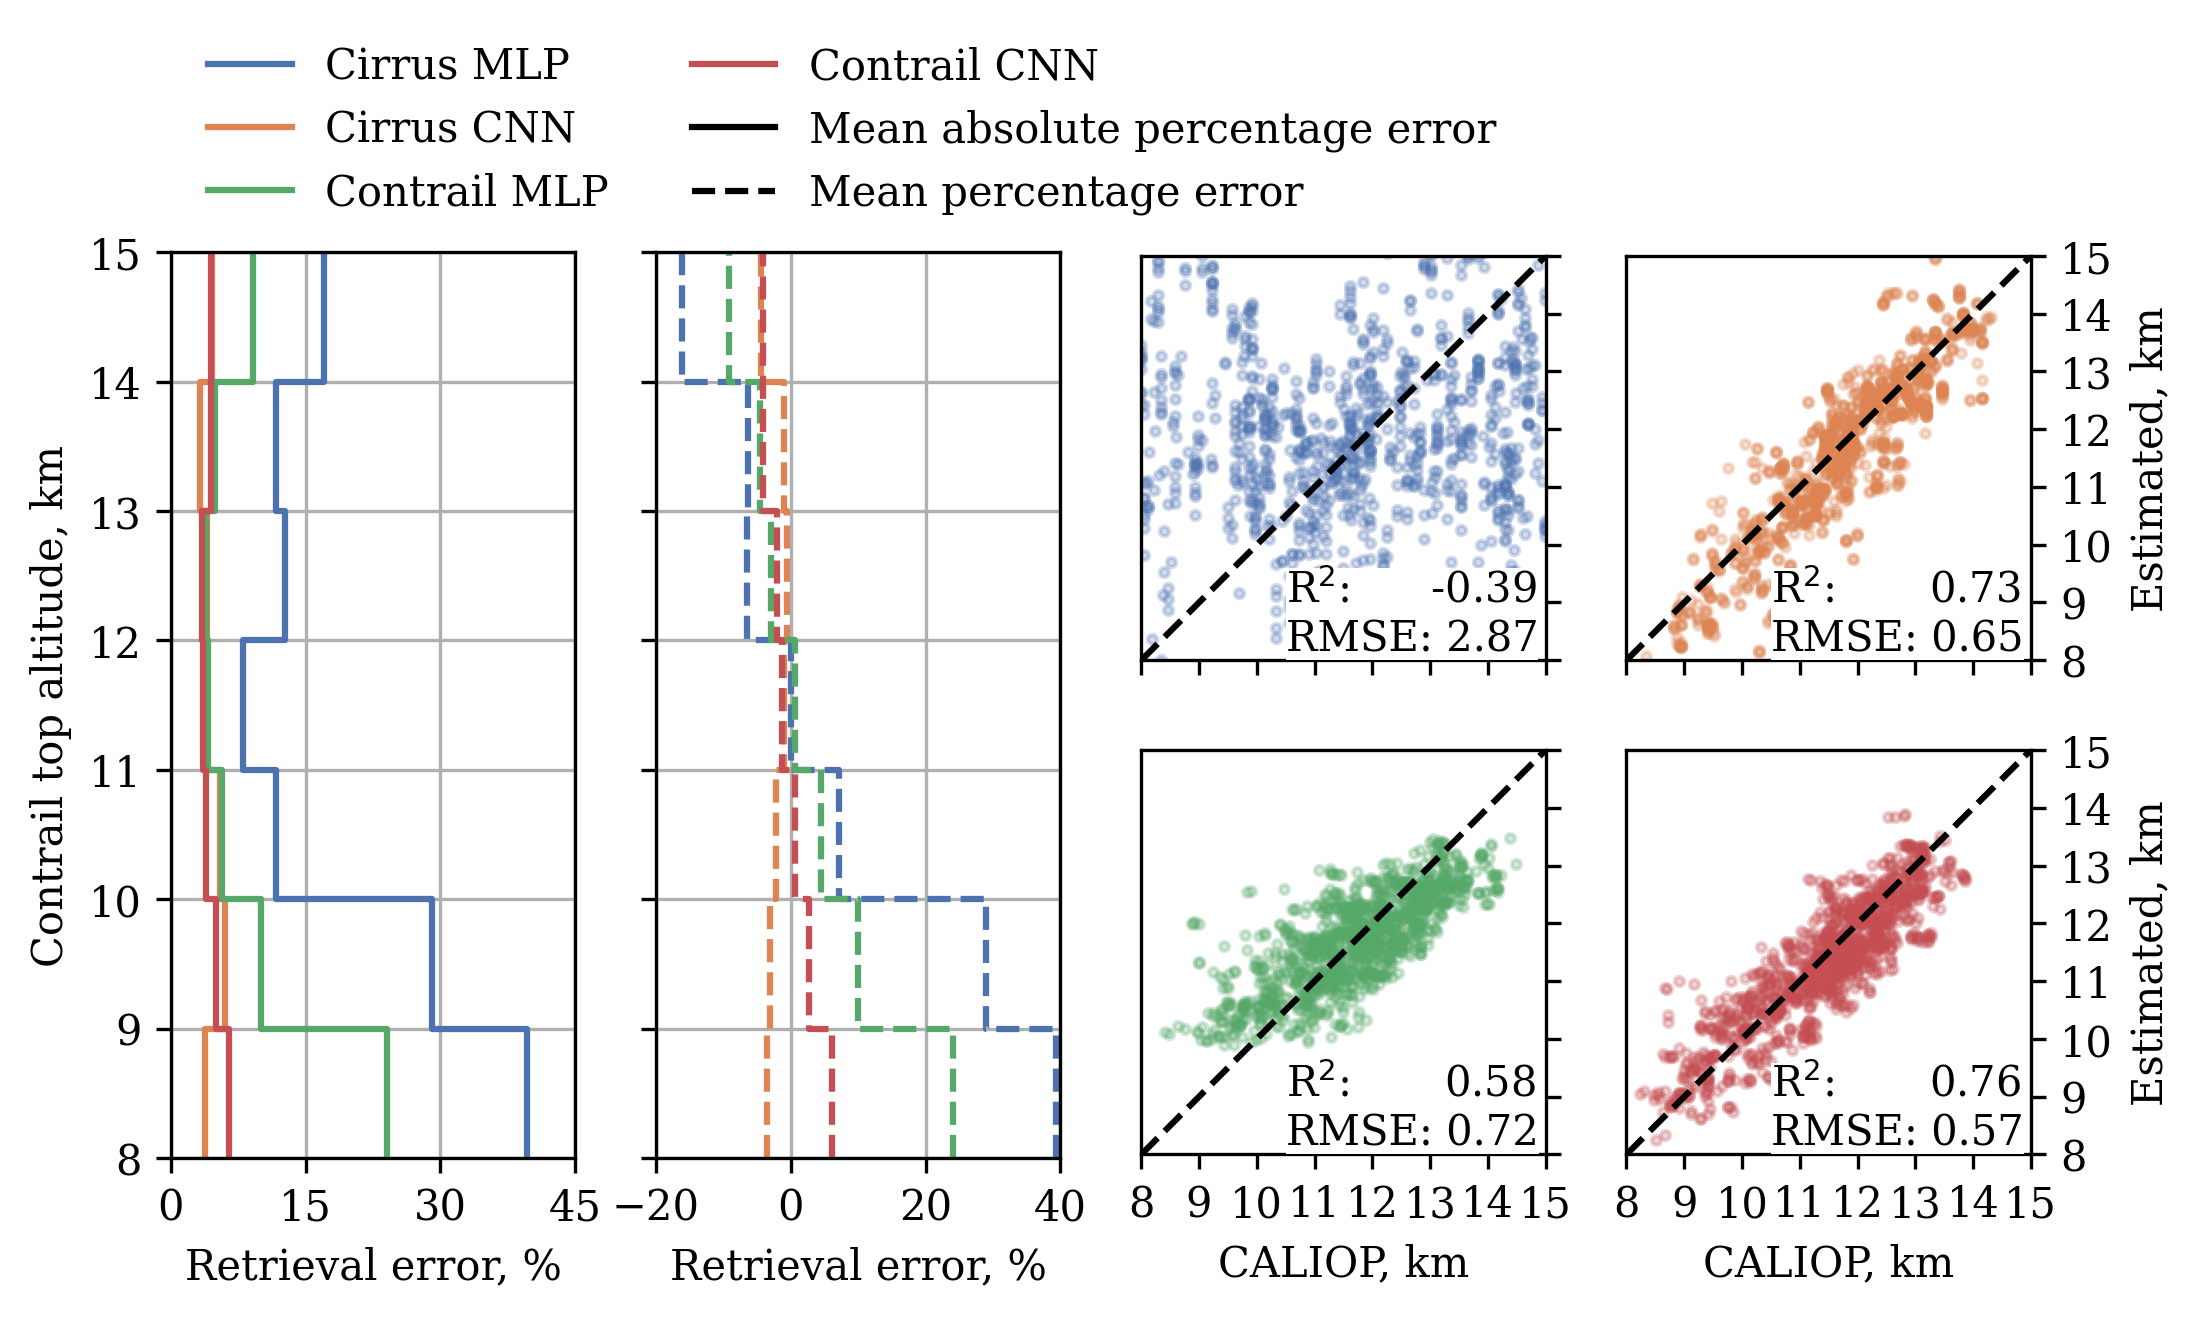

In [5]:
dfs = [cirrus_mlp, cirrus_conv, contrail_mlp, contrail_conv]
colors = sns.color_palette("deep", 4)
labels = ["Cirrus MLP", "Cirrus CNN", "Contrail MLP", "Contrail CNN"]

fig = plt.figure(dpi=300, figsize=(8, 4))

grid = GridSpec(2, 4)

ax_ape = fig.add_subplot(grid[:,0])
ax_pe = fig.add_subplot(grid[:,1])
SIZE = 5
ALPHA = 0.25
lim = [8, 15]

axes = []


for i in range(len(dfs)):
    
    df = dfs[i]
    color = colors[i]
    label = labels[i]
    
    grouped = get_grouped(df)
    
    grouped = grouped[(grouped.y >= 8)*(grouped.y<=15)]
    ax_pe.step(np.hstack((grouped.pe.values, grouped.pe.values[-1:])),
             np.hstack((grouped.index.values, 15)), c=color, linestyle='dashed', where='pre')
    
    ax_ape.step(np.hstack((grouped.ape.values, grouped.ape.values[-1:])),
            np.hstack((grouped.index.values, 15)), c=color, where='pre',
               label=label)
    
    r, c = np.unravel_index(i, (2,2))
    ax = fig.add_subplot(grid[r, c+2])
    
    y = df.y.values
    y_hat = df.y_hat.values
    r2 = r2_score(y, y_hat)
    rmse = mean_squared_error(y, y_hat)**0.5
    
    
    
    ax.scatter(y, y_hat, c=color, s=SIZE, alpha=ALPHA)
    ax.set_xlim(*lim)
    ax.set_ylim(*lim)
    ax.plot(lim, lim, c="k", linestyle="dashed")
    ax.set_aspect("equal")
    axes.append(ax)
    
    bbox_props = {"facecolor" : "w", "edgecolor" : "none", "boxstyle":"square,pad=0"}
    xloc = 10.5
    
    if r2 < 0:
        text = r"R${}^2$:      " + str(np.round(r2, 2)) + "\n" \
            + "RMSE: " + str(np.round(rmse, 2))
    else:
        text = r"R${}^2$:       " + str(np.round(r2, 2)) + "\n" \
            + "RMSE: " + str(np.round(rmse, 2))
    
    ax.annotate(text, (xloc, 8.8), xycoords="data",
                ha="left", va="center", bbox=bbox_props)
    ticks = [8, 9, 10, 11, 12, 13, 14, 15]
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    if r == 0:
        ax.set_xticklabels([])
    if c == 0:
        ax.set_yticklabels([])
        
   
    ax.yaxis.tick_right()
    if r == 1:
        ax.set(xlabel="CALIOP, km")
    if c == 1:
        ax.set(ylabel="Estimated, km")
        ax.yaxis.set_label_position("right")

    

    
ax_ape.plot([], [], c="k",
            label="Mean absolute percentage error")

ax_ape.plot([], [], c="k",
            label="Mean percentage error", linestyle="dashed")

ax_ape.set_ylim(8.0, 15.0)
ax_ape.set_xlim(0, 40)
ax_ape.legend()
ax_ape.grid()
ax_ape.legend(loc="lower left", bbox_to_anchor=(0,1), frameon=False, ncol=2)
ax_ape.set(ylabel="Contrail top altitude, km", xlabel="Retrieval error, %")
ax_ape.set_xticks([0, 15, 30, 45])
ax_ape.set_xlim(0, 45)

ax_pe.set_yticklabels([])
ax_pe.set_ylim(8.0, 15.0)
ax_pe.set_xticks([-20, 0, 20, 40])
ax_pe.set_xlim(-20, 40)
ax_pe.grid()
ax_pe.set(xlabel="Retrieval error, %")